In [1]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 1. Problem statement

## 2. Data Gatharing

In [2]:
df = pd.read_csv("Boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.index

RangeIndex(start=0, stop=506, step=1)

In [4]:
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

## 3. EDA

In [5]:
df.isna().sum() / len(df) * 100

Unnamed: 0    0.0
crim          0.0
zn            0.0
indus         0.0
chas          0.0
nox           0.0
rm            0.0
age           0.0
dis           0.0
rad           0.0
tax           0.0
ptratio       0.0
black         0.0
lstat         0.0
medv          0.0
dtype: float64

In [6]:
df.duplicated().sum()

0

#### 1. Check For linearity

In [7]:
df.drop("Unnamed: 0",axis=1, inplace=True)

<Figure size 1500x1000 with 0 Axes>

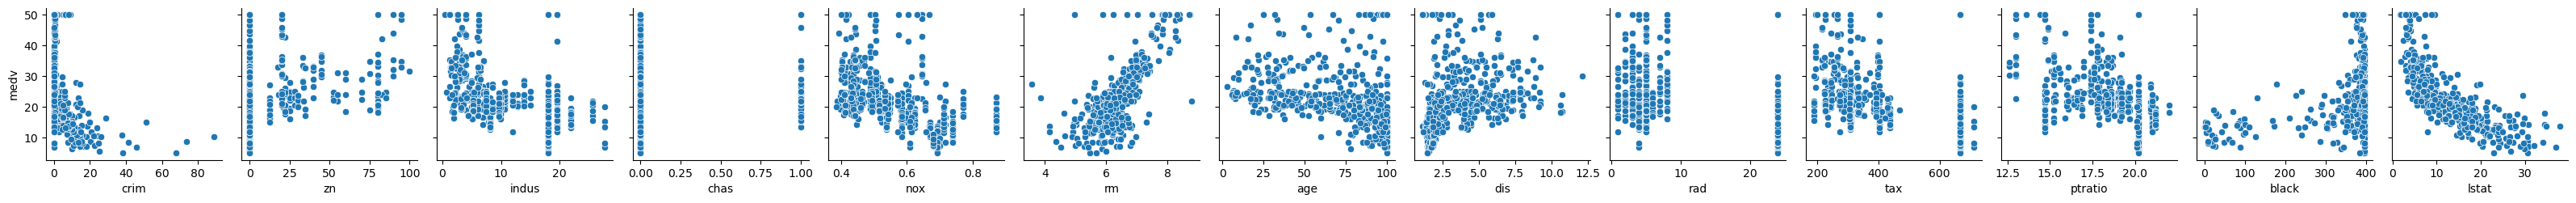

In [8]:
plt.figure(figsize=(15,10))
sns.pairplot(data=df, x_vars=["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "lstat"], y_vars=["medv"], kind="scatter")
plt.savefig("linearity.png")

#### Applying Transformations

#### 1. Log transformaion

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-5.064036,2.890372,0.837248,-inf,-0.619897,1.883275,4.177459,1.408545,0.000000,5.690359,2.727853,5.983684,1.605430,3.178054
1,-3.600502,-inf,1.955860,-inf,-0.757153,1.859574,4.368181,1.602836,0.693147,5.488938,2.879198,5.983684,2.212660,3.072693
2,-3.601235,-inf,1.955860,-inf,-0.757153,1.971996,4.112512,1.602836,0.693147,5.488938,2.879198,5.973377,1.393766,3.546740
3,-3.430523,-inf,0.779325,-inf,-0.780886,1.945624,3.824284,1.802073,1.098612,5.402677,2.928524,5.977949,1.078410,3.508556
4,-2.672924,-inf,0.779325,-inf,-0.780886,1.966693,3.992681,1.802073,1.098612,5.402677,2.928524,5.983684,1.673351,3.589059


<Figure size 1500x1000 with 0 Axes>

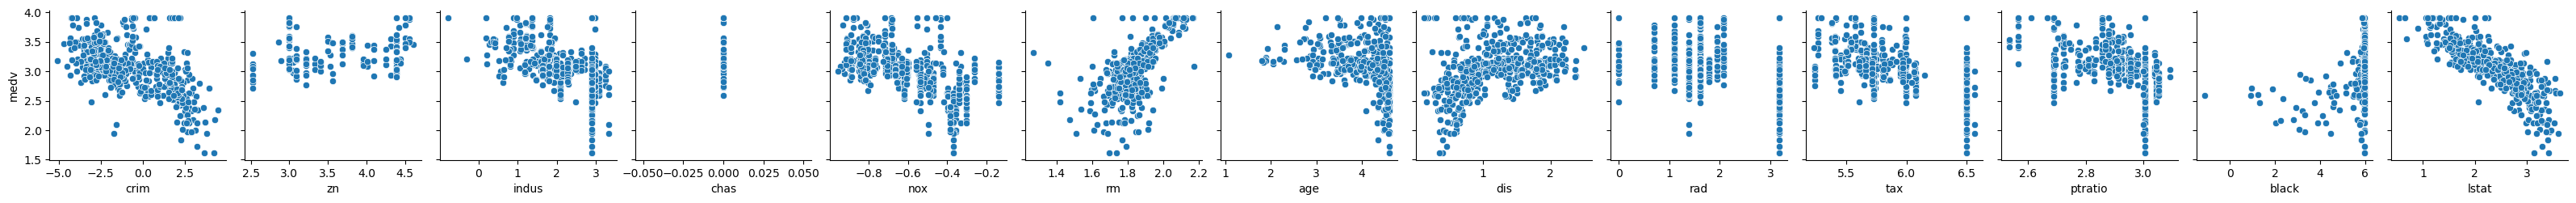

In [9]:
df_log = np.log(df)
display(df_log.head())
plt.figure(figsize=(15,10))
sns.pairplot(data=df_log, x_vars=["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "lstat"], y_vars=["medv"], kind="scatter")

#### 2. sqrt transformation

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.079498,4.242641,1.519868,0.0,0.733485,2.564176,8.074652,2.022375,1.000000,17.204651,3.911521,19.922349,2.231591,4.898979
1,0.165257,0.000000,2.658947,0.0,0.684836,2.533969,8.882567,2.228699,1.414214,15.556349,4.219005,19.922349,3.023243,4.647580
2,0.165197,0.000000,2.658947,0.0,0.684836,2.680485,7.816649,2.228699,1.414214,15.556349,4.219005,19.819939,2.007486,5.890671
3,0.179917,0.000000,1.476482,0.0,0.676757,2.645373,6.767570,2.462154,1.732051,14.899664,4.324350,19.865296,1.714643,5.779273
4,0.262774,0.000000,1.476482,0.0,0.676757,2.673387,7.362065,2.462154,1.732051,14.899664,4.324350,19.922349,2.308679,6.016644


<Figure size 1500x1000 with 0 Axes>

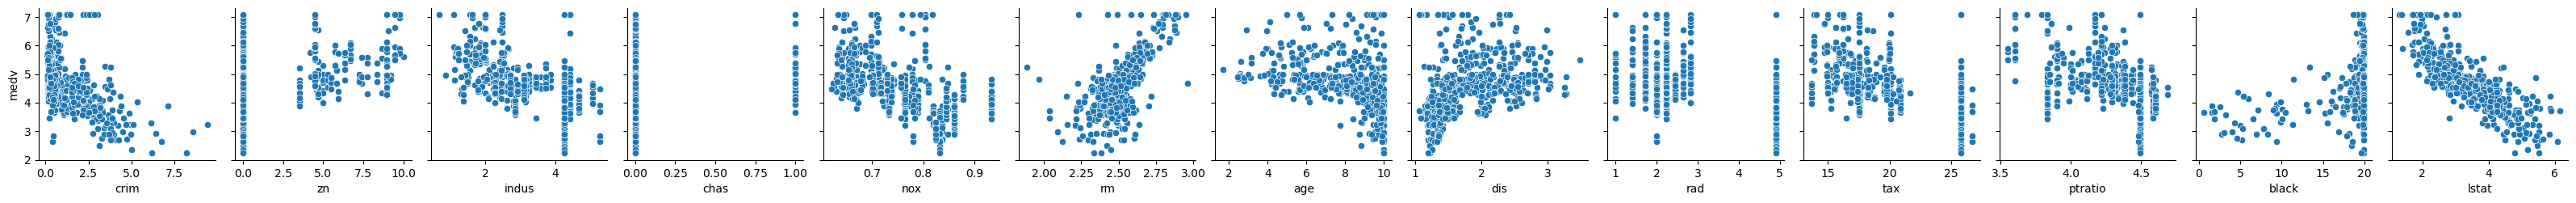

In [10]:
df_sqrt = np.sqrt(df)
display(df_sqrt.head())
plt.figure(figsize=(15,10))
sns.pairplot(data=df_sqrt, x_vars=["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "lstat"], y_vars=["medv"], kind="scatter")

#### 3. cbrt transformation

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.079498,4.242641,1.519868,0.0,0.733485,2.564176,8.074652,2.022375,1.000000,17.204651,3.911521,19.922349,2.231591,4.898979
1,0.165257,0.000000,2.658947,0.0,0.684836,2.533969,8.882567,2.228699,1.414214,15.556349,4.219005,19.922349,3.023243,4.647580
2,0.165197,0.000000,2.658947,0.0,0.684836,2.680485,7.816649,2.228699,1.414214,15.556349,4.219005,19.819939,2.007486,5.890671
3,0.179917,0.000000,1.476482,0.0,0.676757,2.645373,6.767570,2.462154,1.732051,14.899664,4.324350,19.865296,1.714643,5.779273
4,0.262774,0.000000,1.476482,0.0,0.676757,2.673387,7.362065,2.462154,1.732051,14.899664,4.324350,19.922349,2.308679,6.016644


<Figure size 1500x1000 with 0 Axes>

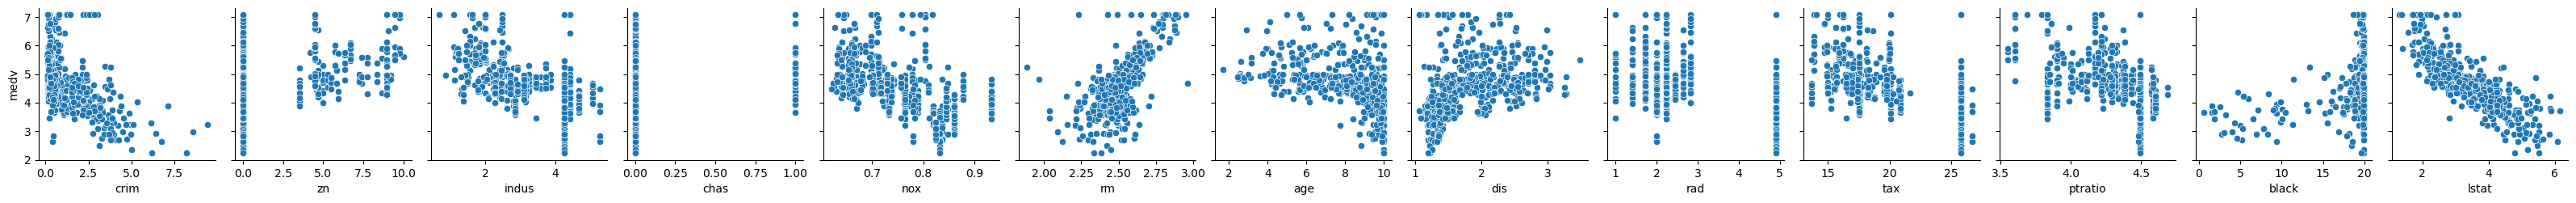

In [11]:
df_cbrt = np.sqrt(df)
display(df_cbrt.head())
plt.figure(figsize=(15,10))
sns.pairplot(data=df_cbrt, x_vars=["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "lstat"], y_vars=["medv"], kind="scatter")

#### 2. Multicolinearity

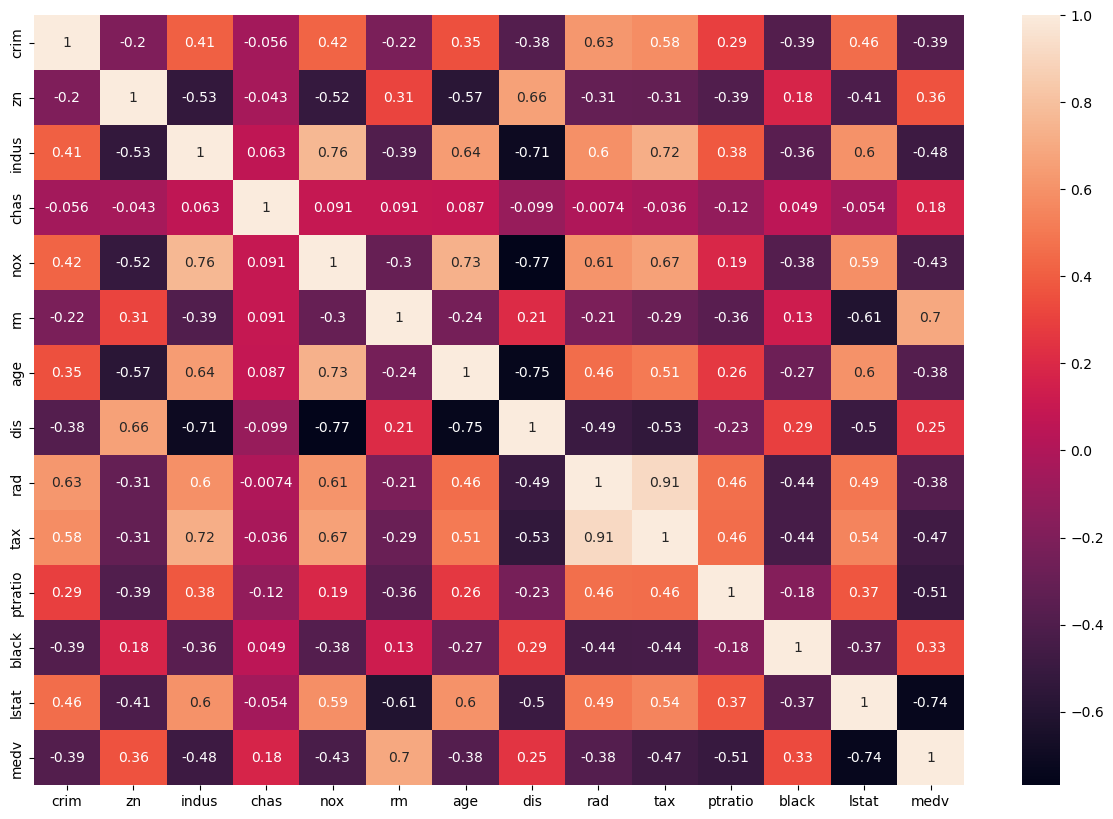

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.savefig("corr_ALL_with_target.png")

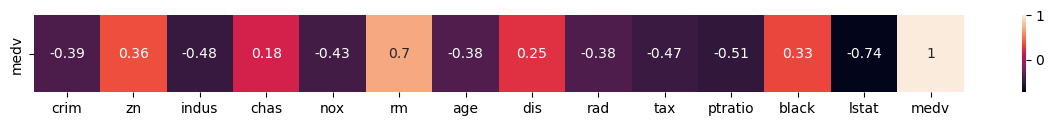

In [13]:
plt.figure(figsize=(15,1))
sns.heatmap(df.corr().tail(1), annot=True)
plt.savefig("corr_with_target.png")

In [14]:
vif = []

for i in range(df.shape[1]-1):
    vf = variance_inflation_factor(df.to_numpy(), i)
    vif.append(vf)
    
rxy = pd.Series(vif, df.columns[:-1])
rxy

crim         2.131404
zn           2.910004
indus       14.485874
chas         1.176266
nox         74.004269
rm         136.101743
age         21.398863
dis         15.430455
rad         15.369980
tax         61.939713
ptratio     87.227233
black       21.351015
lstat       12.615188
dtype: float64

<AxesSubplot:>

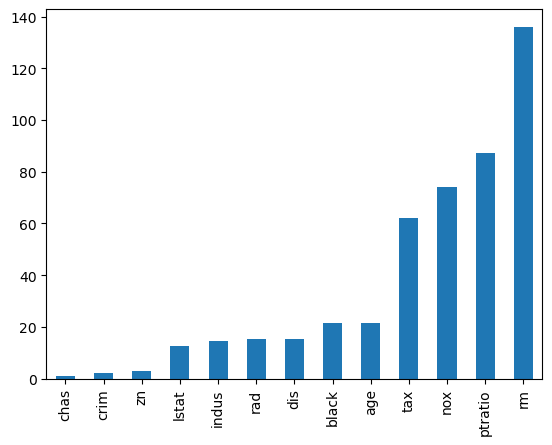

In [15]:
rxy.sort_values().plot(kind="bar")

#### 4. Normal Distribution of the data

array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'black'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

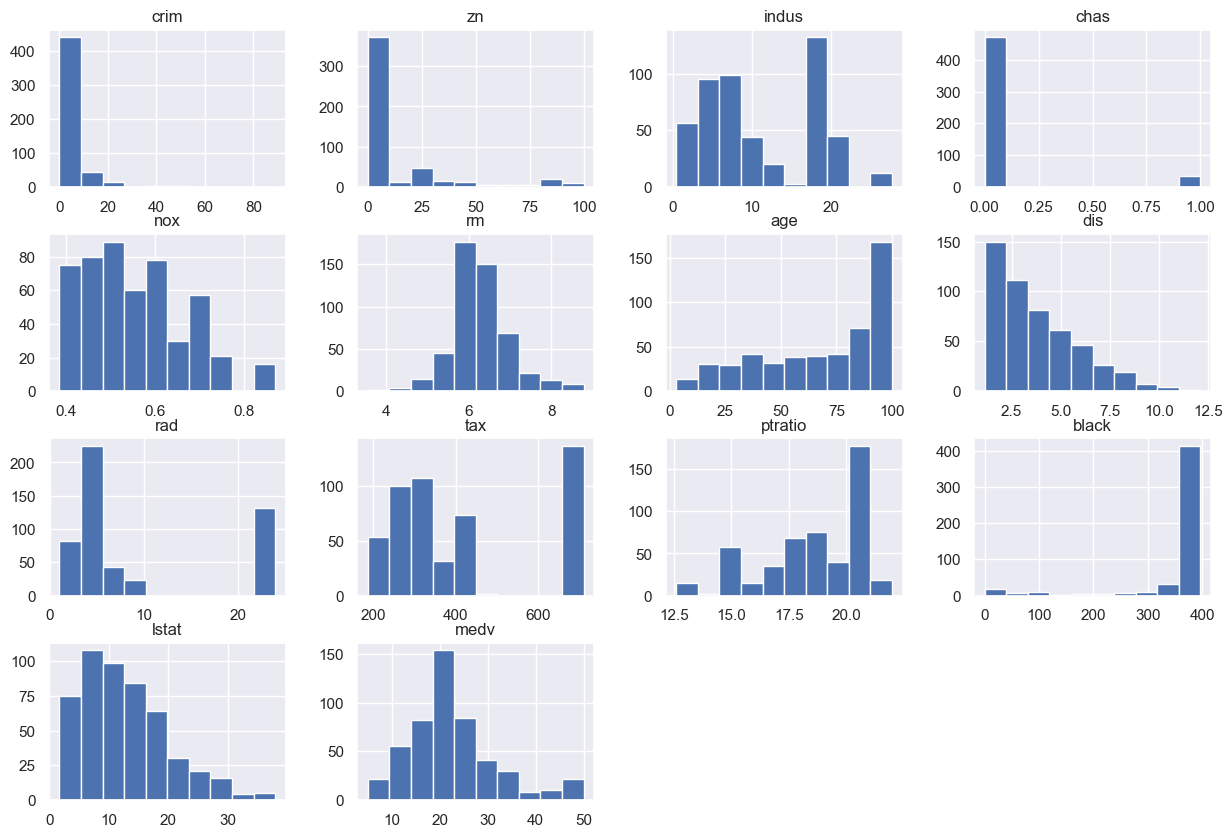

In [16]:
sns.set(color_codes=True)
df.hist(figsize=(15,10))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

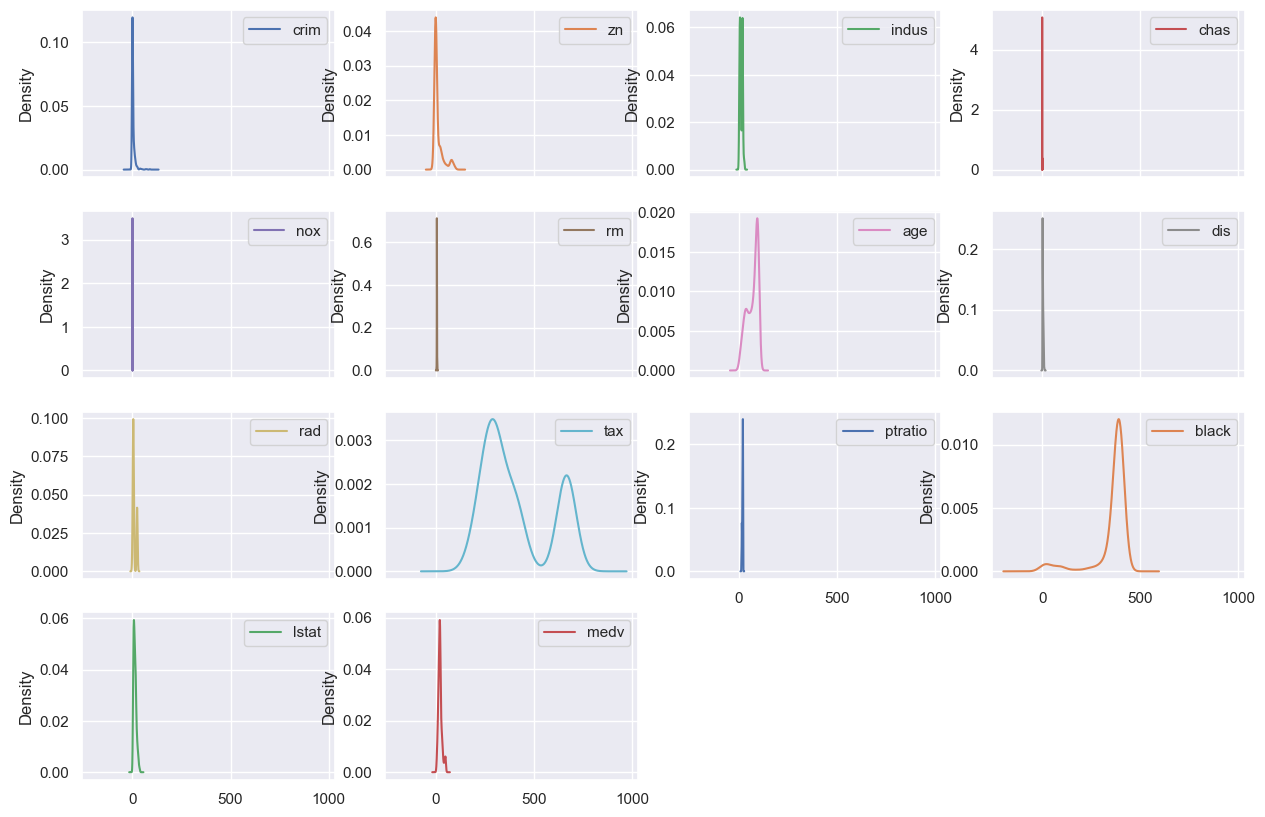

In [17]:
sns.set(color_codes=True)
df.plot(kind="kde" ,figsize=(15,10), subplots=True, layout=(4,4))

###### skewness of the data

In [18]:
df.skew()

crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
black     -2.890374
lstat      0.906460
medv       1.108098
dtype: float64

#### Checking Outliars

crim          AxesSubplot(0.125,0.712609;0.168478x0.167391)
zn         AxesSubplot(0.327174,0.712609;0.168478x0.167391)
indus      AxesSubplot(0.529348,0.712609;0.168478x0.167391)
chas       AxesSubplot(0.731522,0.712609;0.168478x0.167391)
nox           AxesSubplot(0.125,0.511739;0.168478x0.167391)
rm         AxesSubplot(0.327174,0.511739;0.168478x0.167391)
age        AxesSubplot(0.529348,0.511739;0.168478x0.167391)
dis        AxesSubplot(0.731522,0.511739;0.168478x0.167391)
rad            AxesSubplot(0.125,0.31087;0.168478x0.167391)
tax         AxesSubplot(0.327174,0.31087;0.168478x0.167391)
ptratio     AxesSubplot(0.529348,0.31087;0.168478x0.167391)
black       AxesSubplot(0.731522,0.31087;0.168478x0.167391)
lstat             AxesSubplot(0.125,0.11;0.168478x0.167391)
medv           AxesSubplot(0.327174,0.11;0.168478x0.167391)
dtype: object

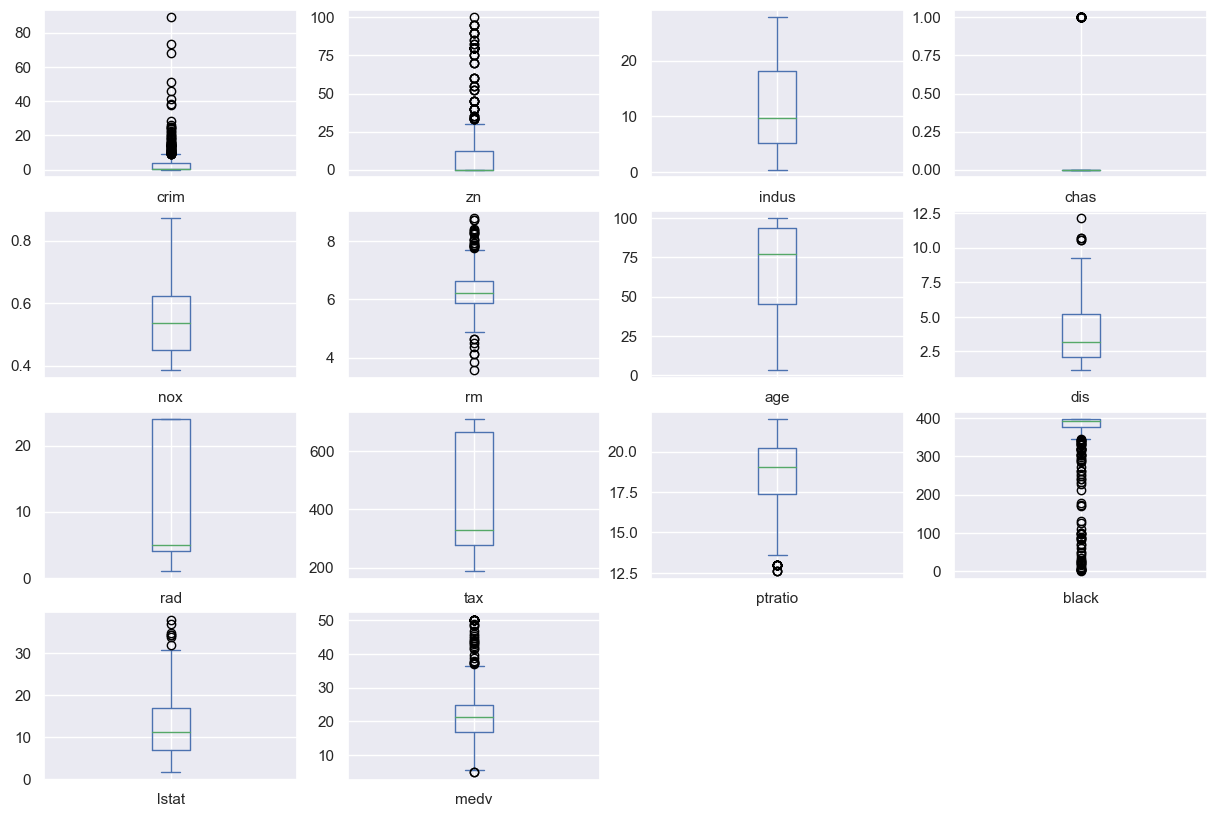

In [19]:
sns.set(color_codes=True)
df.plot(kind="box", figsize=(15,10), subplots=True, layout=(4,4))

array([[<AxesSubplot:xlabel='crim', ylabel='crim'>,
        <AxesSubplot:xlabel='zn', ylabel='crim'>,
        <AxesSubplot:xlabel='indus', ylabel='crim'>,
        <AxesSubplot:xlabel='chas', ylabel='crim'>,
        <AxesSubplot:xlabel='nox', ylabel='crim'>,
        <AxesSubplot:xlabel='rm', ylabel='crim'>,
        <AxesSubplot:xlabel='age', ylabel='crim'>,
        <AxesSubplot:xlabel='dis', ylabel='crim'>,
        <AxesSubplot:xlabel='rad', ylabel='crim'>,
        <AxesSubplot:xlabel='tax', ylabel='crim'>,
        <AxesSubplot:xlabel='ptratio', ylabel='crim'>,
        <AxesSubplot:xlabel='black', ylabel='crim'>,
        <AxesSubplot:xlabel='lstat', ylabel='crim'>,
        <AxesSubplot:xlabel='medv', ylabel='crim'>],
       [<AxesSubplot:xlabel='crim', ylabel='zn'>,
        <AxesSubplot:xlabel='zn', ylabel='zn'>,
        <AxesSubplot:xlabel='indus', ylabel='zn'>,
        <AxesSubplot:xlabel='chas', ylabel='zn'>,
        <AxesSubplot:xlabel='nox', ylabel='zn'>,
        <AxesSubplot:xlabe

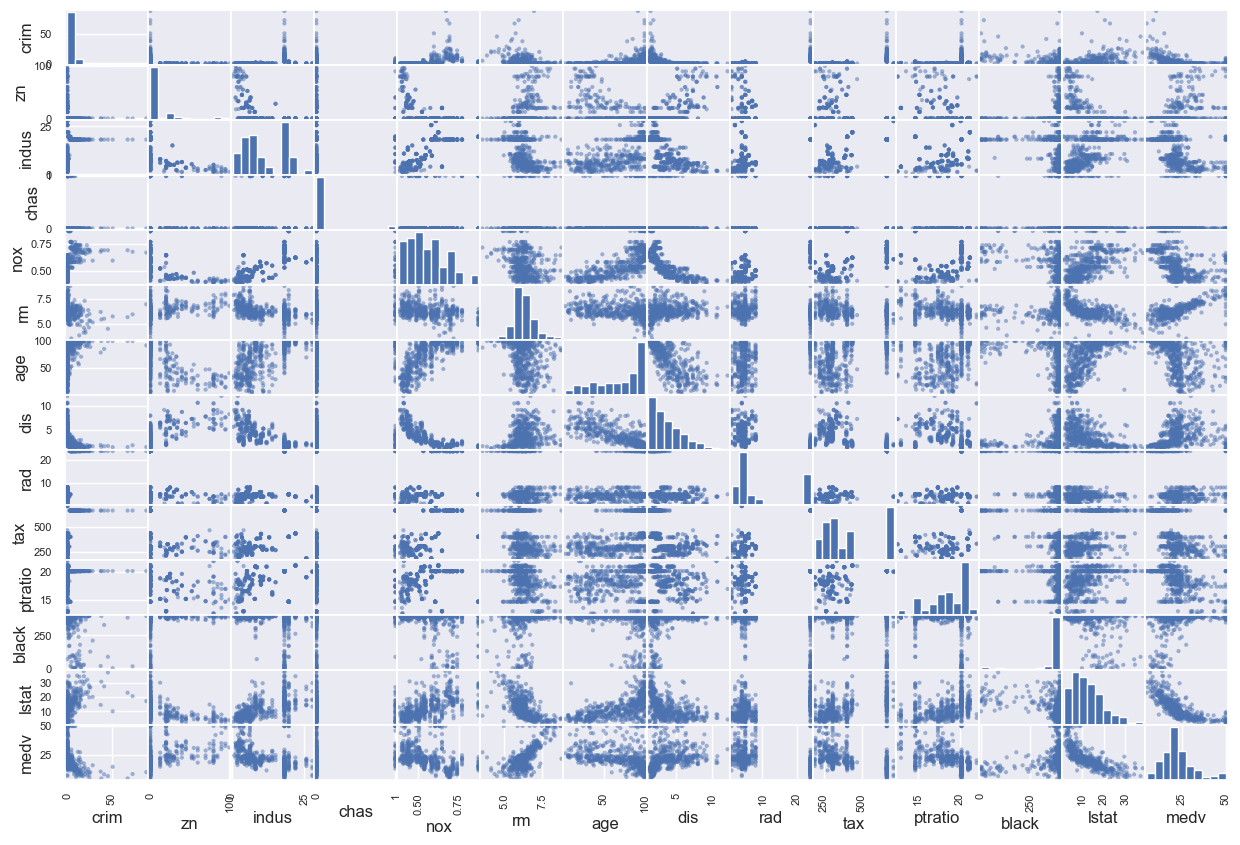

In [20]:
scatter_matrix(df,figsize=(15,10))

In [21]:
df.to_csv("Boston_df.csv")

#### Model Training

In [22]:
X = df.drop("medv",axis=1)
y = df["medv"]

In [23]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##### Training data

Accuracy of the training data is:- 0.7293585058196337


,Columns,Col_Coef
0,crim,-0.112387
1,zn,0.058059
2,indus,0.018359
3,chas,2.129978
4,nox,-19.581101
5,rm,3.095462
6,age,0.004453
7,dis,-1.500476
8,rad,0.305359
9,tax,-0.011123


<BarContainer object of 13 artists>

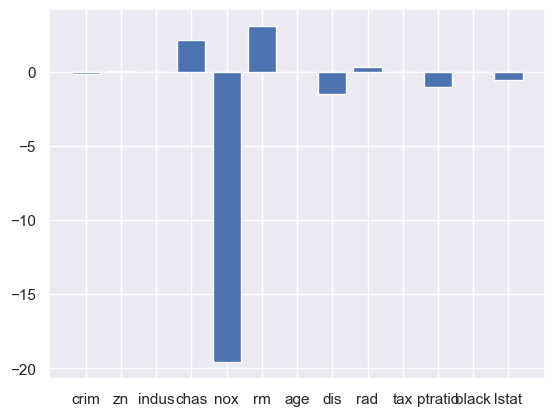

In [24]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)

accuracy_train = r2_score(y_train, y_train_pred)
print(f"Accuracy of the training data is:- {accuracy_train}")
# ploting bar graph in order to visulalise the coifficients and how L1 and L2 regulariasations 
# penalizes the features which are having high coeifficient's
df_coef = pd.DataFrame()

df_coef["Columns"] = X_train.columns
df_coef["Col_Coef"] = lr_model.coef_

display(df_coef)

plt.bar(df_coef["Columns"], df_coef["Col_Coef"])

#### Testing Data

Accuracy of the training data is:- 0.830515327098309


,Columns,Col_Coef
0,crim,-0.088084
1,zn,0.012234
2,indus,-0.014949
3,chas,9.766861
4,nox,-8.910940
5,rm,5.942116
6,age,-0.034422
7,dis,-1.485619
8,rad,0.261267
9,tax,-0.013078


<BarContainer object of 13 artists>

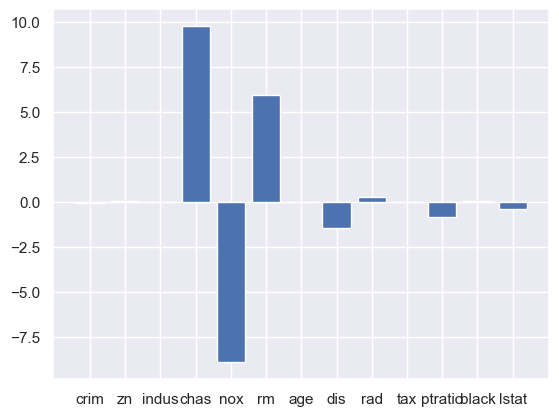

In [25]:
lr_model = LinearRegression()

lr_model.fit(x_test, y_test)

y_test_pred = lr_model.predict(x_test)

accuracy_test = r2_score(y_test, y_test_pred)
print(f"Accuracy of the training data is:- {accuracy_test}")
# ploting bar graph in order to visulalise the coifficients and how L1 and L2 regulariasations 
# penalizes the features which are having high coeifficient's
df_coef = pd.DataFrame()

df_coef["Columns"] = x_test.columns
df_coef["Col_Coef"] = lr_model.coef_

display(df_coef)

plt.bar(df_coef["Columns"], df_coef["Col_Coef"])

#### Hyper tunning on testing dataset by Lasso Regression (L1 Regularisation)

In [26]:
lr_lasso = Lasso()

hyperparameter = {"alpha": np.arange(0.01,5,0.01)}

gscv = GridSearchCV(lr_lasso, hyperparameter, cv=5)
gscv.fit(x_test, y_test)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       4.19, 4.2 , 4.21, 4.22, 4.23, 4.24, 4.25, 4.26, 4.27, 4.28, 4.29,
       4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38, 4.39, 4.4 ,
       4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49, 4.5 , 4.51,
       4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 , 4.61, 4.62,
       4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71, 4.72, 4.73,
       4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82, 4.83, 4.84,
       4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93, 4.94, 4.95,
       4.96, 4.97, 4.

In [27]:
gscv.best_params_

{'alpha': 0.35000000000000003}

Accuracy of the training data is:- 0.830515327098309


,Columns,Col_Coef
0,crim,-0.069703
1,zn,0.013917
2,indus,0.012465
3,chas,0.000000
4,nox,-0.000000
5,rm,5.172426
6,age,-0.021165
7,dis,-1.195025
8,rad,0.258467
9,tax,-0.015137


<BarContainer object of 13 artists>

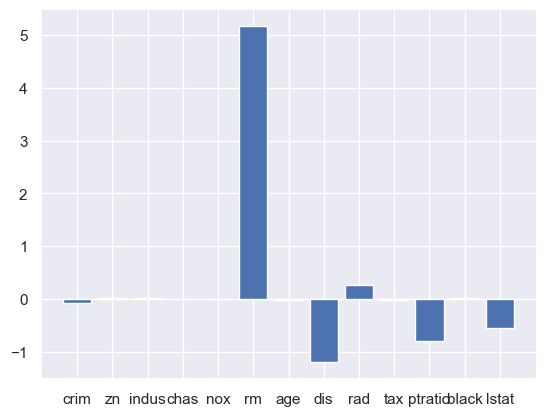

In [28]:
lr_lasso = Lasso(alpha=0.35)

lr_lasso.fit(x_test, y_test)
y_lasso_t_pred = lr_model.predict(x_test)

accuracy_test = r2_score(y_test, y_lasso_t_pred)
print(f"Accuracy of the training data is:- {accuracy_test}")
# ploting bar graph in order to visulalise the coifficients and how L1 and L2 regulariasations 
# penalizes the features which are having high coeifficient's
df_coef = pd.DataFrame()

df_coef["Columns"] = x_test.columns
df_coef["Col_Coef"] = lr_lasso.coef_

display(df_coef)

plt.bar(df_coef["Columns"], df_coef["Col_Coef"])

### Hyper Tunning on Training data set
###### We can identify the difference in the Coefficient's. how much change in the coiefficient's of by applying hypertunning

- as we can observed that when we apply linear regression on the training data the COEF of nox was -19.581101 but after Hyper Tunning it becomes -0.00

Accuracy of the training data is:- 0.6200486075655021


,Columns,Col_Coef
0,crim,-0.091075
1,zn,0.059277
2,indus,-0.036996
3,chas,0.000000
4,nox,-0.000000
5,rm,2.218234
6,age,0.001841
7,dis,-1.006326
8,rad,0.267539
9,tax,-0.013761


<BarContainer object of 13 artists>

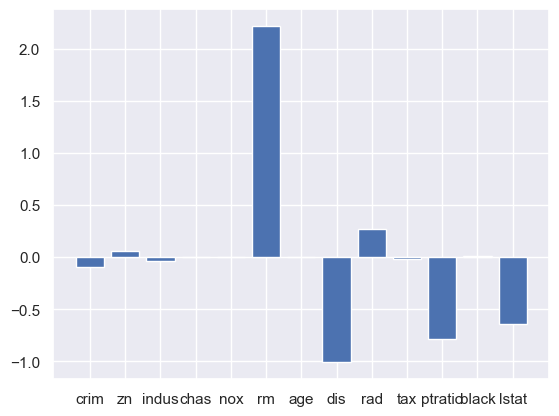

In [29]:
lr_lasso = Lasso(alpha=0.35)

lr_lasso.fit(X_train, y_train)
y_lasso_tr_pred = lr_model.predict(X_train)

accuracy_train = r2_score(y_train, y_lasso_tr_pred)
print(f"Accuracy of the training data is:- {accuracy_train}")
# ploting bar graph in order to visulalise the coifficients and how L1 and L2 regulariasations 
# penalizes the features which are having high coeifficient's
df_coef = pd.DataFrame()

df_coef["Columns"] = X_train.columns
df_coef["Col_Coef"] = lr_lasso.coef_

display(df_coef)

plt.bar(df_coef["Columns"], df_coef["Col_Coef"])

#### Hyper tunning on testing dataset by Ridge Regression (L2 Regularisation)

In [30]:
lr_ridge = Ridge()

hyperparameter = {"alpha": np.arange(0.01,10,0.01)}

gscv = GridSearchCV(lr_ridge, hyperparameter, cv=5)
gscv.fit(x_test, y_test)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       9.25, 9.26, 9.27, 9.28, 9.29, 9.3 , 9.31, 9.32, 9.33, 9.34, 9.35,
       9.36, 9.37, 9.38, 9.39, 9.4 , 9.41, 9.42, 9.43, 9.44, 9.45, 9.46,
       9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57,
       9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67, 9.68,
       9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78, 9.79,
       9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9 ,
       9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99])})

In [31]:
gscv.best_params_

{'alpha': 3.7199999999999998}

Accuracy of the training data is:- 0.6200486075655021


,Columns,Col_Coef
0,crim,-0.104193
1,zn,0.059333
2,indus,-0.046327
3,chas,1.701900
4,nox,-4.888205
5,rm,3.150942
6,age,-0.006985
7,dis,-1.281855
8,rad,0.274925
9,tax,-0.012634


<BarContainer object of 13 artists>

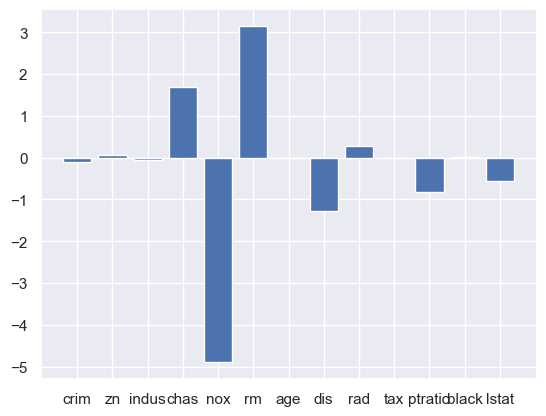

In [32]:
lr_ridge = Ridge(alpha=3.71)

lr_ridge.fit(X_train, y_train)
y_ridge_tr_pred = lr_model.predict(X_train)

accuracy_train = r2_score(y_train, y_ridge_tr_pred)
print(f"Accuracy of the training data is:- {accuracy_train}")
# ploting bar graph in order to visulalise the coifficients and how L1 and L2 regulariasations 
# penalizes the features which are having high coeifficient's
df_coef = pd.DataFrame()

df_coef["Columns"] = X_train.columns
df_coef["Col_Coef"] = lr_ridge.coef_

display(df_coef)

plt.bar(df_coef["Columns"], df_coef["Col_Coef"])

Accuracy of the training data is:- 0.830515327098309


,Columns,Col_Coef
0,crim,-0.104193
1,zn,0.059333
2,indus,-0.046327
3,chas,1.701900
4,nox,-4.888205
5,rm,3.150942
6,age,-0.006985
7,dis,-1.281855
8,rad,0.274925
9,tax,-0.012634


<BarContainer object of 13 artists>

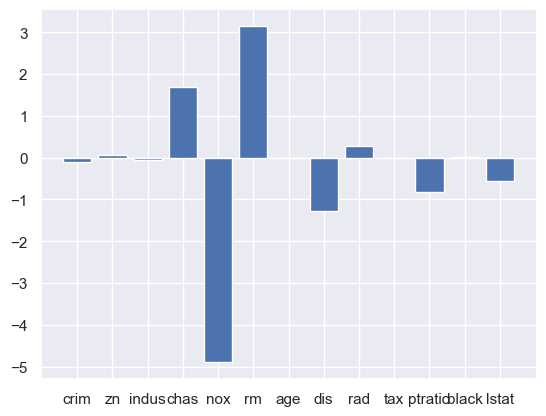

In [33]:
lr_ridge = Ridge(alpha=3.71)

lr_ridge.fit(X_train, y_train)
y_ridge_t_pred = lr_model.predict(x_test)

accuracy_train = r2_score(y_test, y_ridge_t_pred)
print(f"Accuracy of the training data is:- {accuracy_train}")
# ploting bar graph in order to visulalise the coifficients and how L1 and L2 regulariasations 
# penalizes the features which are having high coeifficient's
df_coef = pd.DataFrame()

df_coef["Columns"] = x_test.columns
df_coef["Col_Coef"] = lr_ridge.coef_

display(df_coef)

plt.bar(df_coef["Columns"], df_coef["Col_Coef"])

In [34]:
li = df.columns.to_list()
print(li)

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


In [36]:
# [cr, zn,indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat, medv]